In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduates-admission-prediction/admission_data.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Let's Explore the data

In [3]:
df = pd.read_csv('/kaggle/input/graduates-admission-prediction/admission_data.csv')
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
#Let's rename few columns
df.rename(columns = {'GRE Score':'GRE_Score', 'TOEFL Score':'TOEFL_Score', 'University Rating':'University_Rating'}, inplace = True)

In [6]:
df.columns

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
df.describe()

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE_Score          500 non-null    int64  
 1   TOEFL_Score        500 non-null    int64  
 2   University_Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


<AxesSubplot:ylabel='Chance of Admit '>

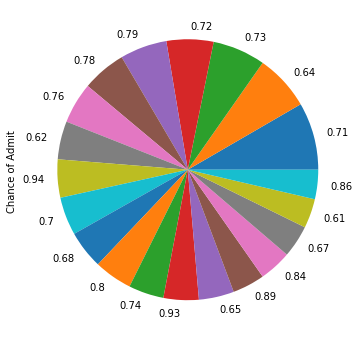

In [9]:
#Exploring variables

df['Chance of Admit '].value_counts().head(20).plot(kind = 'pie', figsize = (6,6))


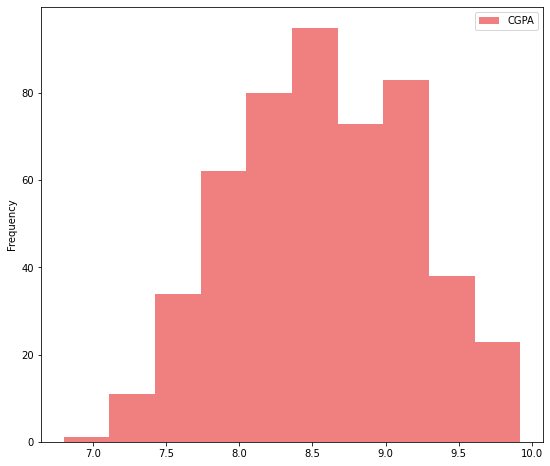

In [10]:
#Checking relation between Chances of admit and CGPA
df.plot(x='Chance of Admit ', y='CGPA', kind="hist", figsize=(9, 8), color = 'lightcoral')
plt.show()

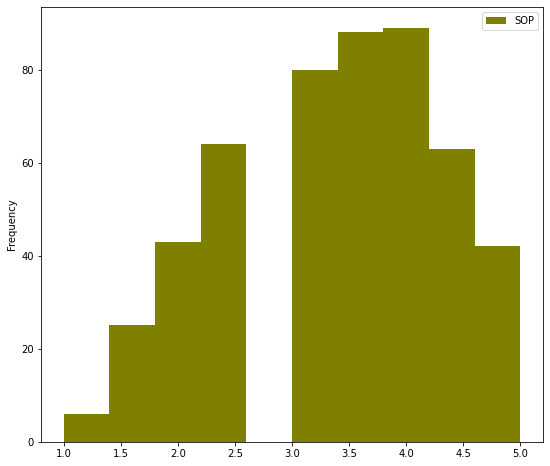

In [11]:
#Checking relation between Chances of admit and SOP
df.plot(x='Chance of Admit ', y='SOP', kind="hist", figsize=(9, 8), color = 'olive')
plt.show()

The plot depicts that lower the value of SOP, lower is the Chance of Admit

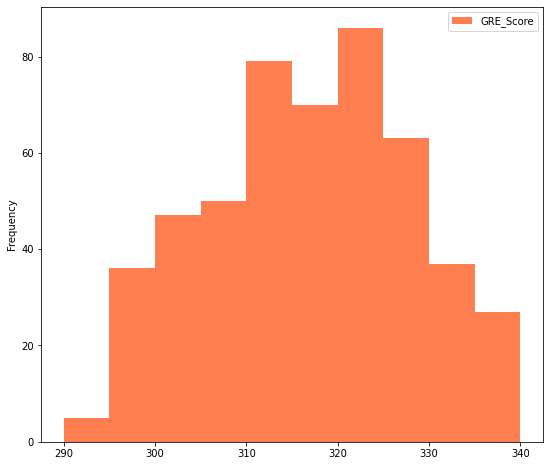

In [12]:
#Checking relation between Chances of admit and Gre Score
df.plot(x='Chance of Admit ', y='GRE_Score', kind="hist", figsize=(9, 8), color = 'coral')
plt.show()

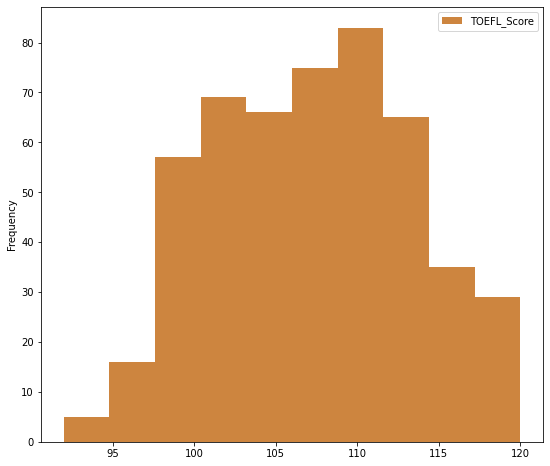

In [13]:
#Checking relation between Chances of admit and TOEFL Score
df.plot(x='Chance of Admit ', y='TOEFL_Score', kind="hist", figsize=(9, 8), color = 'peru')
plt.show()

<AxesSubplot:xlabel='Chance of Admit ', ylabel='GRE_Score'>

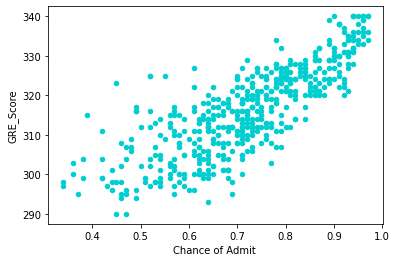

In [14]:
df.plot.scatter('Chance of Admit ','GRE_Score', color = 'darkturquoise')

<AxesSubplot:xlabel='Chance of Admit ', ylabel='GRE_Score'>

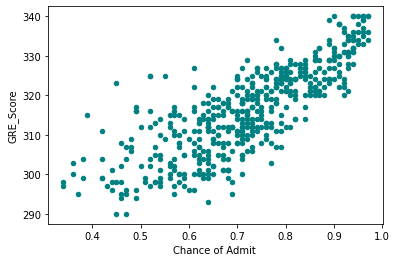

In [15]:
df.plot.scatter('Chance of Admit ','GRE_Score', color = 'teal')

<AxesSubplot:xlabel='Chance of Admit ', ylabel='Research'>

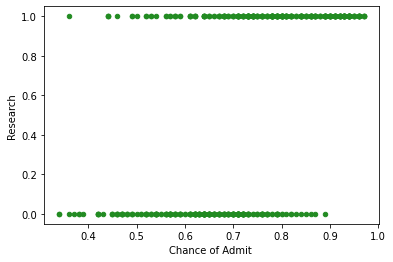

In [16]:
df.plot.scatter('Chance of Admit ','Research', color = 'forestgreen')

Research experience seems to have moderate to high impact on Admit chances.

In [17]:
#fig, ax = plt.subplots()

#ax.plot(df['Chance of Admit '], df['TOEFL_Score'], color = 'goldenrod')
#ax.plot(df['Chance of Admit '], df['GRE_Score'], color = 'darkturquoise')
#plt.show()

**From Data Analysis, we can say that a Good to moderate GRE and TOEFL score along with research experience can land students with an admit.**

# Data Preprocessing

In [18]:
#Split data into values and labels (Y = Mx + b) M = weights, b = Bias

x = df.drop('Chance of Admit ', axis = 1)
y = df['Chance of Admit ']

In [19]:
#Let's make data workable i.e scale the data with simple scaler
# This gives R2 score of about 0.77

#from sklearn import preprocessing
#x = preprocessing.scale(x)

In [20]:
#Now try scaling with MinMaxScaler
#This helps to increase R2 score (~0.8)
from sklearn.preprocessing import MinMaxScaler

Scale  = MinMaxScaler()

features = ['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit ']

df[features] = Scale.fit_transform(df[features])

df[features]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063
...,...,...,...,...,...,...,...,...
495,0.84,0.571429,1.00,0.875,0.750,0.711538,1.0,0.841270
496,0.94,0.892857,1.00,1.000,1.000,0.983974,1.0,0.984127
497,0.80,1.000000,1.00,0.875,1.000,0.884615,1.0,0.936508
498,0.44,0.392857,0.75,0.750,1.000,0.522436,0.0,0.619048


# Train_Test_Split

In [21]:
#Split data into train and test data for both x and y
from sklearn.model_selection import train_test_split

# 80% train data and 20% test data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
X_train.shape

(400, 7)

In [23]:
y_train.shape

(400,)

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = lr.predict(X_test)

# Prediction Metrics and plots

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8266186314510113

**A R2 Score of 1.0 indicates perfect fit i.e a perfect straight line**. 

Here, we got R2 score near 0.8 that is still pretty good fit to a straight line.

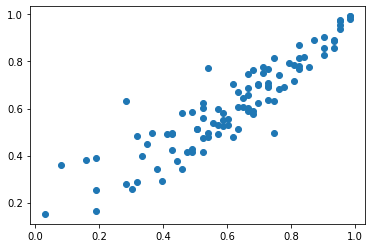

In [27]:
# Plotting scatter plot to check fit.
plt.scatter(y_test,y_pred)

The fit turns about to be approximately a straight line.

**Thank You :)**

*Please feel free to share your feedbacks and suggestions in the comments :)*